# Introduction

# New Section

# New Section


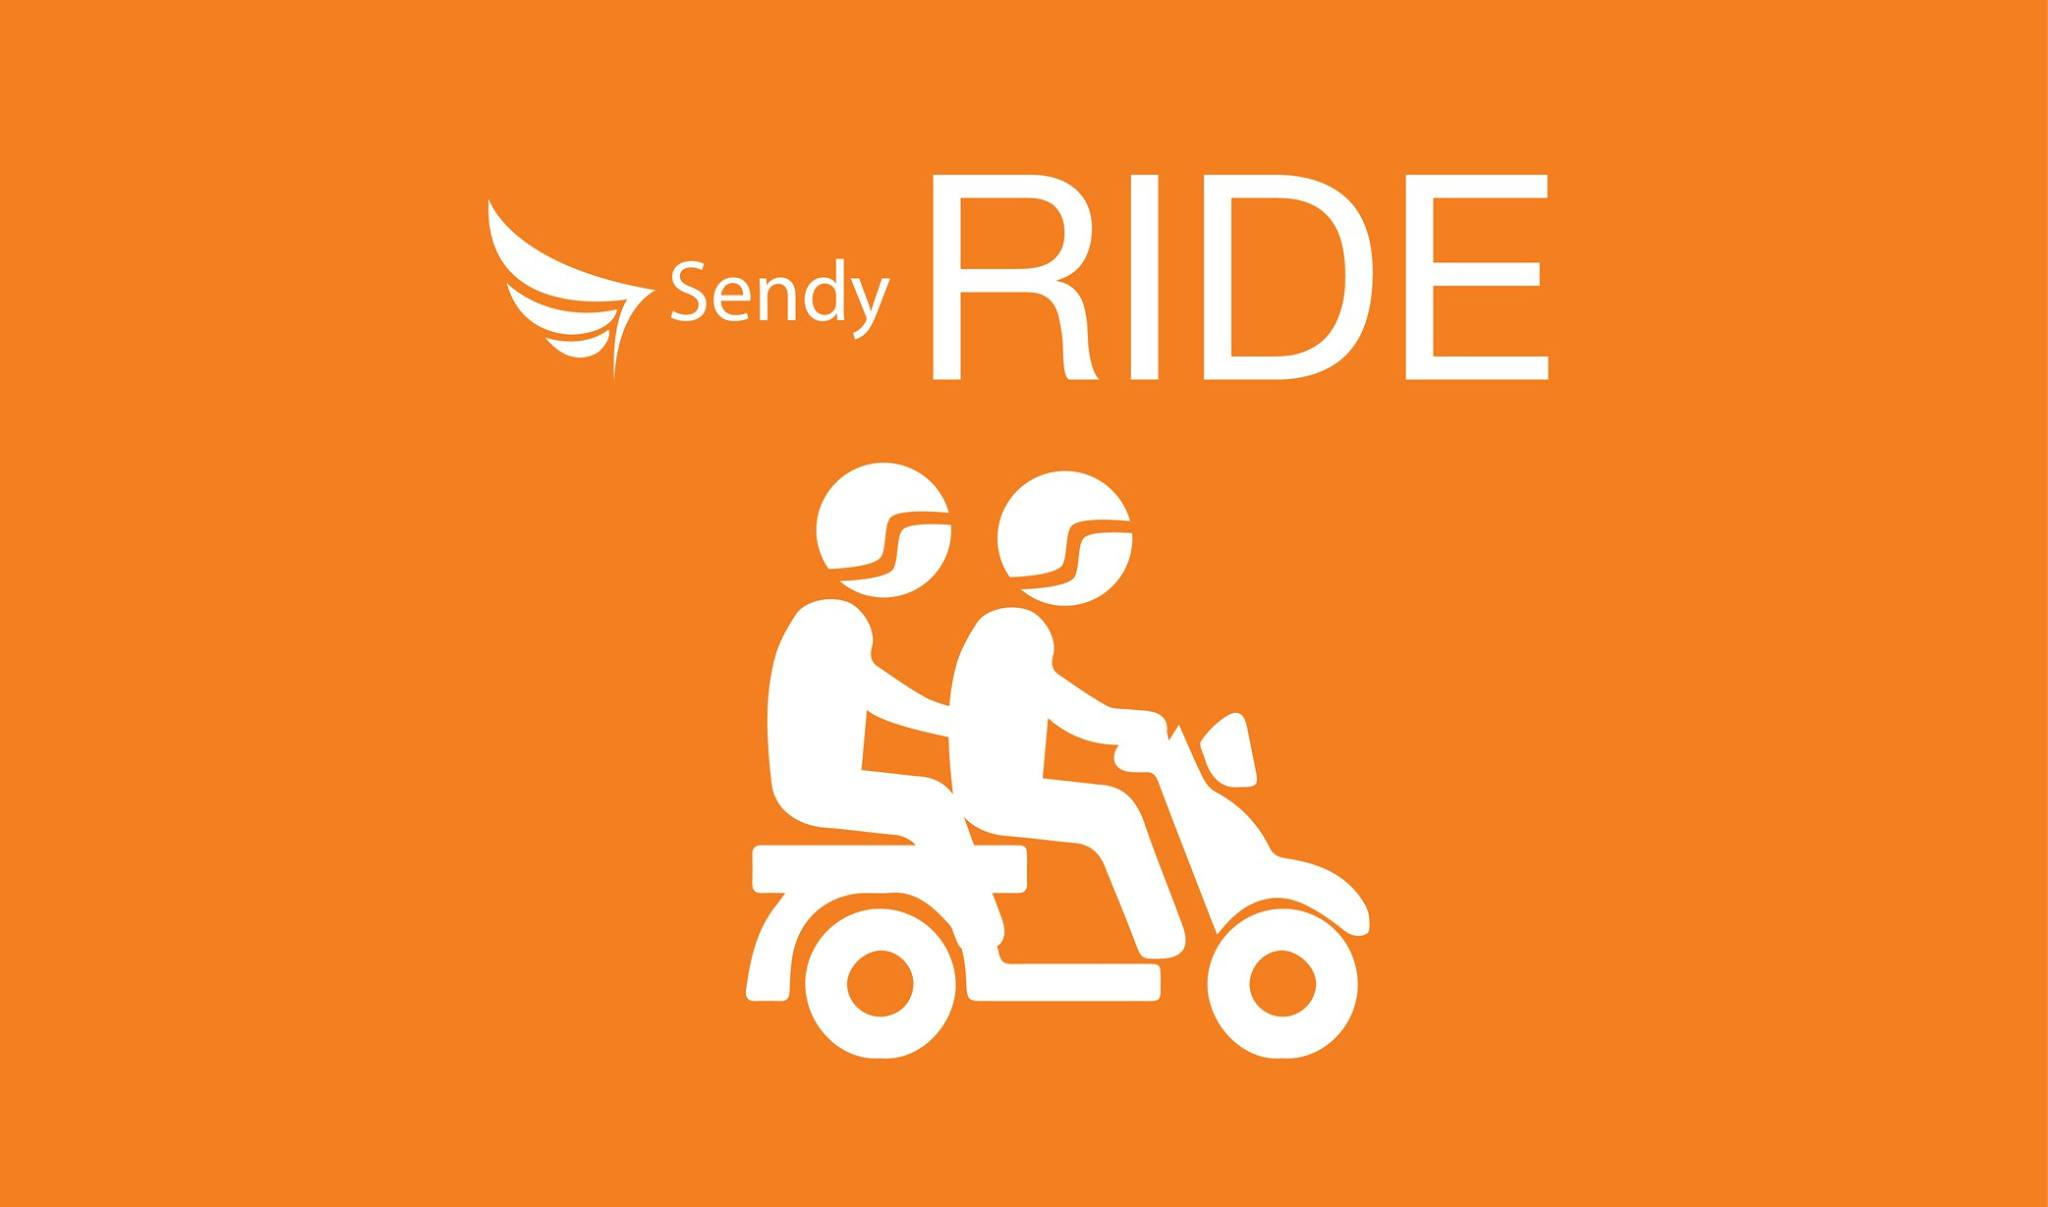



Sendy is a business-to-business platform established in 2014, to enable businesses of all types and sizes to transport goods more efficiently across East Africa.

The company is headquartered in Kenya with a team of more than 100 staff, focused on building practical solutions for Africa’s dynamic transportation needs, from developing apps and web solutions, to providing dedicated support for goods on the move.

Currently operating in Kenya and Uganda, Sendy is expanding to Nigeria and Tanzania, to enable thousands more businesses to move volumes of goods easily, anywhere, at any time. Sendy aggregates a pool of delivery options from 28 ton, 14 ton, 5 ton trucks to pick up trucks, vans and motorcycles.

# Research Objective

Our main objective is to build a model that predict the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at final destination.

The solution will help Sendy enhance customer communication and improve the reliability of its service; which will ultimately improve customer experience. In addition, the solution will enable Sendy to realise cost savings, and ultimately reduce the cost of doing business, through improved resource management and planning for order scheduling.

# Metric of Success

At the end of this project will find a regression model that predict the time from pick to drop and have a smaller RMSE than other Sendy projects and a higher Adjusted R squared. 

# Data Understanding

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import r2_score,mean_squared_error
warnings.filterwarnings("ignore")

In [ ]:
## importing data sets
#Train dataset
data_train=pd.read_csv('/content/Train.csv')
# riders dataset
data_riders = pd.read_csv("/content/Riders.csv")

In [ ]:
#previewing the train dataset
data_train.head(2)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993


In [ ]:
# checking for the Total  number of rows and columns
data_train.shape

(21201, 29)

In [ ]:
# previewing the riders dataset
data_riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [ ]:
## the shape of the datasets
data_riders.shape

(960, 5)

In [ ]:
#data types(train dataset)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [ ]:
#### data infor for riders
data_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


#Data cleaning and manipulation

In [ ]:
#checking for missing values in the train
print(data_train.isnull().sum())


Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

We have a significant number of missing values  in Precipitation in millimeters and few in temperature. 

We will drop Precipitation in millimeters and impute the temperature mean in that column

In [ ]:
#filling missing values in Temperature with mean
data_train['Temperature'] = data_train['Temperature'].fillna(value = data_train['Temperature'].mean())

In [ ]:
# dropping the column that contains atleast one missing value(precipitation in mm)
data_train=data_train.drop('Precipitation in millimeters',axis=1)

In [ ]:
#checking for duplicates
print(data_train.duplicated().sum())

0


In [ ]:
# Removing spaces in the column names.
data_train.columns = data_train.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace("-", "")
data_train.columns

Index(['order_no', 'user_id', 'vehicle_type', 'platform_type',
       'personal_or_business', 'placement__day_of_month',
       'placement__weekday_mo_=_1', 'placement__time',
       'confirmation__day_of_month', 'confirmation__weekday_mo_=_1',
       'confirmation__time', 'arrival_at_pickup__day_of_month',
       'arrival_at_pickup__weekday_mo_=_1', 'arrival_at_pickup__time',
       'pickup__day_of_month', 'pickup__weekday_mo_=_1', 'pickup__time',
       'arrival_at_destination__day_of_month',
       'arrival_at_destination__weekday_mo_=_1',
       'arrival_at_destination__time', 'distance_km', 'temperature',
       'pickup_lat', 'pickup_long', 'destination_lat', 'destination_long',
       'rider_id', 'time_from_pickup_to_arrival'],
      dtype='object')

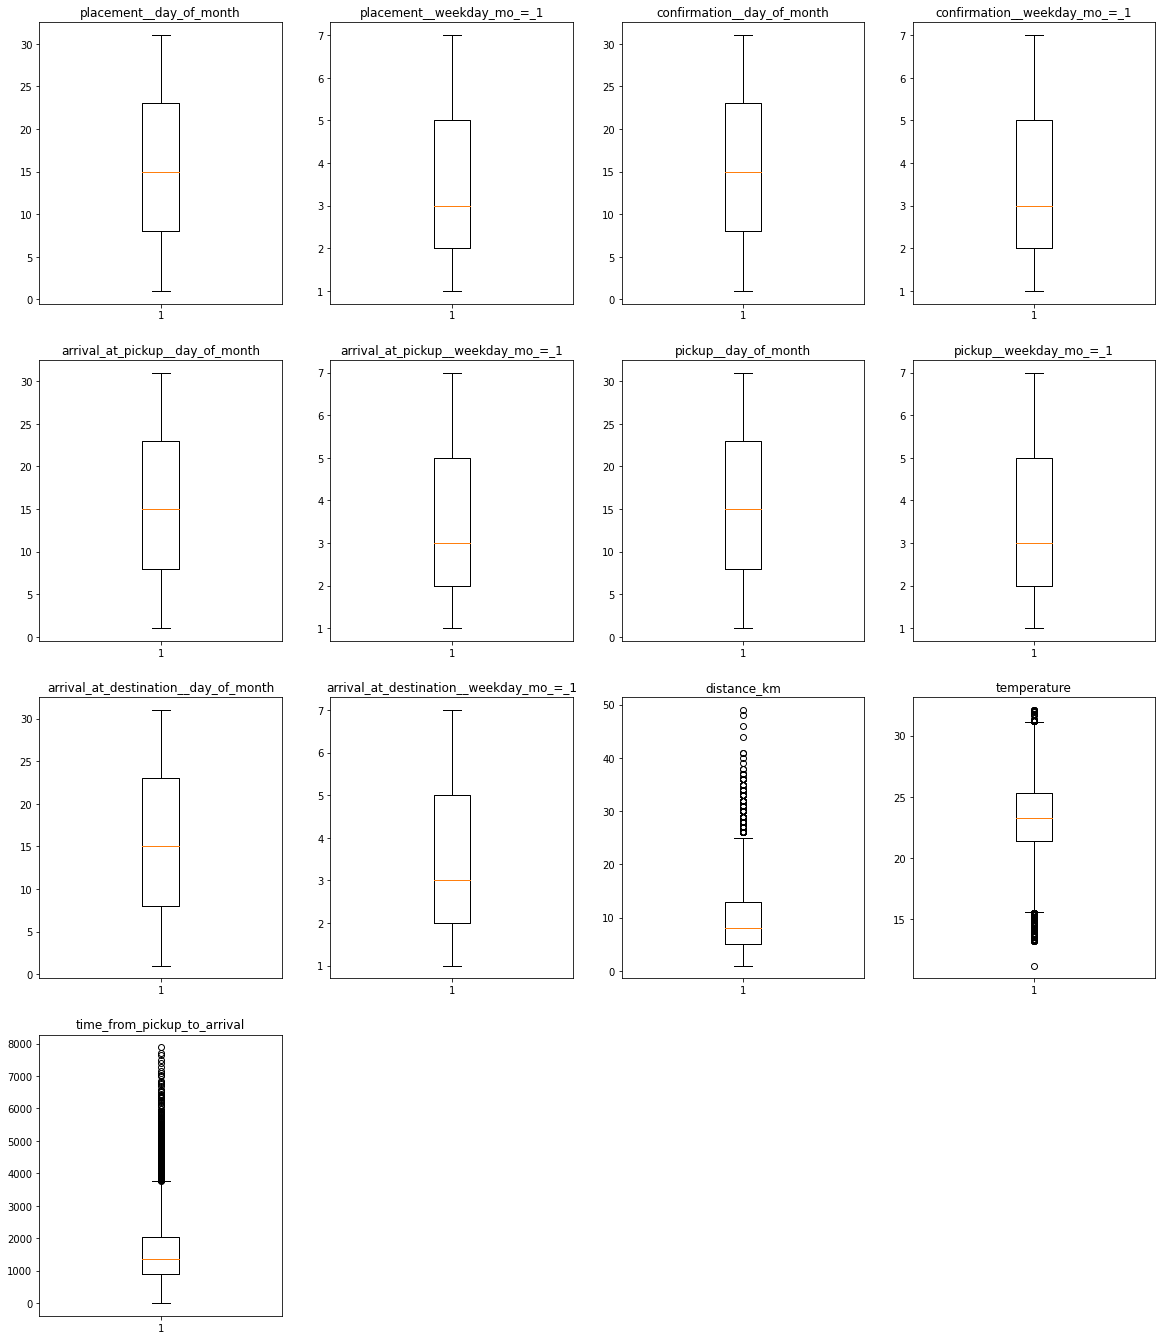

In [ ]:
#checking for outliers
num_cols = {'placement__day_of_month':1,
       'placement__weekday_mo_=_1':2,
       'confirmation__day_of_month':3, 'confirmation__weekday_mo_=_1':4,
       'arrival_at_pickup__day_of_month':5,
       'arrival_at_pickup__weekday_mo_=_1':6,
       'pickup__day_of_month':7, 'pickup__weekday_mo_=_1':8,
       'arrival_at_destination__day_of_month':9,
       'arrival_at_destination__weekday_mo_=_1':10,
       'distance_km':11, 'temperature':12,'time_from_pickup_to_arrival':13}
plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in num_cols.items():
  plt.subplot(5,4,i)
  plt.boxplot(data_train[variable])
  plt.title(variable)

plt.show() 

there are no significant outliers in our features. 
the outliers in temperature and distance variables are just the rides who travelled to far distances  and temperature are days when the temperature were not normal.

But our label have outliers that are not logical eg ride that took  less that 1 minutes, hence we will remove them.

In [ ]:
### removing outliers in time from pick up to arrival column
condition = [
    (data_train['time_from_pickup_to_arrival'] >= 1) & (data_train['time_from_pickup_to_arrival'] <= 120), (data_train['time_from_pickup_to_arrival'] >=120)]
values = ['below 120', 'above 120']
data_train['pick_up_delivery_time_group'] = np.select(condition, values)
data_train =data_train.loc[data_train['pick_up_delivery_time_group'] == 'above 120']

In [ ]:
### looking for missing values in data_riders dataset
data_riders.isnull().sum()

Rider Id          0
No_Of_Orders      0
Age               0
Average_Rating    0
No_of_Ratings     0
dtype: int64

In [ ]:
#removing  spaces in data_riders's columns
data_riders.columns = data_riders.columns.str.lower().str.replace(' ', '_')
data_riders.columns

Index(['rider_id', 'no_of_orders', 'age', 'average_rating', 'no_of_ratings'], dtype='object')

We merge the rider dataset with the riders dataset with train

dataset, On the rider ID.

In [ ]:
## merging the rider and train dataset.
train = data_train.merge(data_riders, on='rider_id', how='left')
train.head(3)

,order_no,user_id,vehicle_type,platform_type,personal_or_business,placement__day_of_month,placement__weekday_mo_=_1,placement__time,confirmation__day_of_month,confirmation__weekday_mo_=_1,confirmation__time,arrival_at_pickup__day_of_month,arrival_at_pickup__weekday_mo_=_1,arrival_at_pickup__time,pickup__day_of_month,pickup__weekday_mo_=_1,pickup__time,arrival_at_destination__day_of_month,arrival_at_destination__weekday_mo_=_1,arrival_at_destination__time,distance_km,temperature,pickup_lat,pickup_long,destination_lat,destination_long,rider_id,time_from_pickup_to_arrival,pick_up_delivery_time_group,no_of_orders,age,average_rating,no_of_ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,above 120,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,above 120,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,above 120,1023,242,12.5,114


In [ ]:
## grouping the label column to visualize it and understand it 
conditions = [
    (train['time_from_pickup_to_arrival'] >= 1) & (train['time_from_pickup_to_arrival'] <= 1600),
    (train['time_from_pickup_to_arrival'] >= 1601) & (train['time_from_pickup_to_arrival'] <= 3200),
    (train['time_from_pickup_to_arrival'] >= 3201) & (train['time_from_pickup_to_arrival'] <= 4800),
    (train['time_from_pickup_to_arrival'] >= 4801) & (train['time_from_pickup_to_arrival'] <= 6400),
    (train['time_from_pickup_to_arrival'] >= 6401) & (train['time_from_pickup_to_arrival'] <= 8000)
    ]
# create a list of the values we want to assign for each condition
values = ['Below 1600', '1601-3200', '3201-4800', '4801-6400', 'above 6400']   
# create a new column and use np.select to assign values to it using our lists as arguments
train['time_from_pickup_to_arrival_group'] = np.select(conditions, values)

Grouping the days of the month into weeks, 
the first 7 days is first week, 7 -14 is 2nd week then 14-21 is 3rd week then

21-31 is the 4th week
 This is only for placement day month because all 
 rides were placed and completed in the same week

In [ ]:
# Create a list to store the data
Place_Day_Month = []
# Using a for loop to populate the list
for Each_Day in train['placement__day_of_month']:
    if (Each_Day > 0 and Each_Day <=7):
        Place_Day_Month.append('1st Week')        
    elif (Each_Day > 7 and Each_Day <=15):
        Place_Day_Month.append('2nd Week')
    elif (Each_Day > 15 and Each_Day <=23):
        Place_Day_Month.append('3rd Week')
    else:
        Place_Day_Month.append('4th Week')           
# Storing the data as a column in train columns
train['placement_day_into_weeks'] = Place_Day_Month

Converting our placement time , confirmation time and arrival time into 
datetime hour so that we can classify them in groups

In [ ]:
# Import datetime Library
from datetime import datetime as dt
# converting placement time in hours 
train['placement'] = train['placement__time'].apply(lambda x: dt.strptime(x,'%I:%M:%S %p'))
train['placement_hour'] = train['placement'].dt.hour
## converting confirmation time into hours
train['confirmation'] = train['confirmation__time'].apply(lambda x: dt.strptime(x,'%I:%M:%S %p'))
train['confirmation_hour'] = train['confirmation'].dt.hour
#converting arrival time into hours
train['arrival_at_pickup'] = train['arrival_at_pickup__time'].apply(lambda x: dt.strptime(x,'%I:%M:%S %p'))
train['arrival_at_pickup_hour'] = train['arrival_at_pickup'].dt.hour

In [ ]:
## grouping the placement _hour from to Early morning to late night
## a function to classify time of day
def get_hr(hour):
    if (hour > 4) and (hour <= 8):
        return 'Early Morning'
    elif (hour > 8) and (hour < 12 ):
        return 'Morning'
    elif (hour >= 12) and (hour <= 16):
        return'Noon'
    elif (hour > 16) and (hour <= 20):
        return 'Evening'
    elif (hour > 20) and (hour <= 22):
        return'Night'
    else:
        return'Late Night'
#Appending the Categorized get_hr onto the Extracted hour from the timdestamp
train['placement_time_of_day'] = train['placement_hour'].apply(get_hr)

In [ ]:
## Grouping the arrival hour from Early morning to Late Night
## a function to classify time of day
def get_hr(hour):
    if (hour > 4) and (hour <= 8):
        return 'Early Morning'
    elif (hour > 8) and (hour < 12 ):
        return 'Morning'
    elif (hour >= 12) and (hour <= 16):
        return'Noon'
    elif (hour > 16) and (hour <= 20):
        return 'Evening'
    elif (hour > 20) and (hour <= 22):
        return'Night'
    else:
        return'Late Night'
#Appending the Categorized get_hr onto the Extracted hour from the timdestamp
train['arrival time of day'] = train['arrival_at_pickup_hour'].apply(get_hr)

In [ ]:
## Grouping the confirmation hours from early morning to late night
## a function to classify time of day
def get_hr(hour):
    if (hour > 4) and (hour <= 8):
        return 'Early Morning'
    elif (hour > 8) and (hour < 12 ):
        return 'Morning'
    elif (hour >= 12) and (hour <= 16):
        return'Noon'
    elif (hour > 16) and (hour <= 20):
        return 'Evening'
    elif (hour > 20) and (hour <= 22):
        return'Night'
    else:
        return'Late Night'
#Appending the Categorized get_hr onto the Extracted hour from the timdestamp
train['confirmation time of  day'] = train['confirmation_hour'].apply(get_hr)

Grouping the placement weekdays into weekdays and weekend

In [ ]:
## creating  weekend and week days
train['weekend/week day'] = np.where(train['placement__weekday_mo_=_1']< 6,'Weekday','Weekend')

In [ ]:
## cleaning data
train.head()

,order_no,user_id,vehicle_type,platform_type,personal_or_business,placement__day_of_month,placement__weekday_mo_=_1,placement__time,confirmation__day_of_month,confirmation__weekday_mo_=_1,confirmation__time,arrival_at_pickup__day_of_month,arrival_at_pickup__weekday_mo_=_1,arrival_at_pickup__time,pickup__day_of_month,pickup__weekday_mo_=_1,pickup__time,arrival_at_destination__day_of_month,arrival_at_destination__weekday_mo_=_1,arrival_at_destination__time,distance_km,temperature,pickup_lat,pickup_long,destination_lat,destination_long,rider_id,time_from_pickup_to_arrival,pick_up_delivery_time_group,no_of_orders,age,average_rating,no_of_ratings,time_from_pickup_to_arrival_group,placement_day_into_weeks,placement,placement_hour,confirmation,confirmation_hour,arrival_at_pickup,arrival_at_pickup_hour,placement_time_of_day,arrival time of day,confirmation time of day,weekend/week day
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,above 120,1637,1309,13.8,549,Below 1600,2nd Week,1900-01-01 09:35:46,9,1900-01-01 09:40:10,9,1900-01-01 10:04:47,10,Morning,Morning,Morning,Weekday
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,above 120,396,339,13.6,69,1601-3200,2nd Week,1900-01-01 11:16:16,11,1900-01-01 11:23:21,11,1900-01-01 11:40:22,11,Morning,Morning,Morning,Weekday
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,above 120,1023,242,12.5,114,Below 1600,4th Week,1900-01-01 12:39:25,12,1900-01-01 12:42:44,12,1900-01-01 12:49:34,12,Noon,Noon,Noon,Weekday
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,above 120,886,283,14.5,113,Below 1600,2nd Week,1900-01-01 09:25:34,9,1900-01-01 09:26:05,9,1900-01-01 09:37:56,9,Morning,Morning,Morning,Weekday
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,above 120,2311,872,14.1,533,Below 1600,2nd Week,1900-01-01 09:55:18,9,1900-01-01 09:56:18,9,1900-01-01 10:03:53,10,Morning,Morning,Morning,Weekday


In [ ]:
### exportthe updated data
train.to_csv('data.csv')

# Exploratory Data Analysis

Univariate Analysis

In [ ]:
# summary statistic
train.describe()

,platform_type,placement__day_of_month,placement__weekday_mo_=_1,confirmation__day_of_month,confirmation__weekday_mo_=_1,arrival_at_pickup__day_of_month,arrival_at_pickup__weekday_mo_=_1,pickup__day_of_month,pickup__weekday_mo_=_1,arrival_at_destination__day_of_month,arrival_at_destination__weekday_mo_=_1,distance_km,temperature,pickup_lat,pickup_long,destination_lat,destination_long,time_from_pickup_to_arrival,no_of_orders,age,average_rating,no_of_ratings,placement_hour,confirmation_hour,arrival_at_pickup_hour
count,20379.000000,20379.000000,20379.000000,20379.000000,20379.000000,20379.000000,20379.000000,20379.000000,20379.000000,20379.000000,20379.000000,20379.000000,20379.000000,20379.000000,20379.000000,20379.000000,20379.000000,20379.000000,20379.000000,20379.000000,20379.000000,20379.000000,20379.000000,20379.000000,20379.000000
mean,2.743952,15.641739,3.241474,15.641886,3.241621,15.641886,3.241621,15.641886,3.241621,15.641886,3.241621,9.633103,23.224176,-1.281276,36.811155,-1.282644,36.811309,1618.991413,1644.706659,974.939497,13.892095,340.323225,12.319888,12.442367,12.660091
std,0.633802,8.793978,1.568796,8.793948,1.568726,8.793948,1.568726,8.793948,1.568726,8.793948,1.568726,5.672048,3.227675,0.030622,0.037790,0.035138,0.045068,956.355193,1505.336091,639.288506,0.907025,404.097810,2.539294,2.554836,2.556156
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,-1.438302,36.653621,-1.430298,36.606594,121.000000,2.000000,96.000000,0.000000,0.000000,6.000000,6.000000,7.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,21.300000,-1.300921,36.783799,-1.301446,36.785507,936.000000,557.000000,495.000000,13.700000,60.000000,10.000000,10.000000,11.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.258889,-1.279395,36.806784,-1.284583,36.808002,1410.000000,1209.000000,872.000000,14.000000,158.000000,12.000000,12.000000,13.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.200000,-1.257147,36.828668,-1.261084,36.829282,2076.000000,2273.000000,1218.000000,14.300000,504.000000,14.000000,14.000000,15.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000,9756.000000,3764.000000,15.200000,2298.000000,22.000000,22.000000,23.000000


In [ ]:
### number of orders
print('Total number of orders: ',len(train['order_no'].unique()))

Total number of orders:  20379


In [ ]:
##number of riders
print('Number of riders :   ',len(train['rider_id'].unique()))

Number of riders :    922


In [ ]:
#number of users/ customers
print('Number of customers: ',len(train['user_id'].unique()))

Number of customers:  3173


In [ ]:
#summary statistics
train[['temperature','distance_km','time_from_pickup_to_arrival']].agg([np.mean,np.median])

,temperature,distance_km,time_from_pickup_to_arrival
mean,23.224176,9.633103,1618.991413
median,23.258889,8.000000,1410.000000


It took approximately on average 25 minutes for a rider to pick a customers and drop them at they destination.

Most of the rides took 22-23 minutes.

In [ ]:
## number of orders per platform type

train.pivot_table(values='order_no',index='platform_type',
                       columns='personal_or_business',aggfunc='count',margins=True,fill_value=0).sort_values(by=['Business','Personal']
                                                                                   ,ascending=False)

personal_or_business,Business,Personal,All
platform_type,,,
All,16581,3798,20379
3,16192,1061,17253
1,309,1823,2132
2,60,914,974
4,20,0,20


In [ ]:
##### number orders per  day

train.pivot_table(values='order_no',index='placement__day_of_month',
                       columns='personal_or_business',aggfunc='count',margins=True,fill_value=0).sort_values(by=['Business','Personal']
                                                                                   ,ascending=False)

personal_or_business,Business,Personal,All
placement__day_of_month,,,
All,16581,3798,20379
8,695,124,819
7,660,119,779
13,653,130,783
14,638,136,774
6,617,147,764
4,599,149,748
28,596,154,750
18,592,151,743


In [ ]:
### Number of minutes per platform
train.groupby('platform_type')['time_from_pickup_to_arrival'].agg([np.mean]).sort_values(by='mean',ascending=False)

,mean
platform_type,
4,1675.150000
3,1627.169826
1,1583.719981
2,1550.175565


Bivariate Analysis

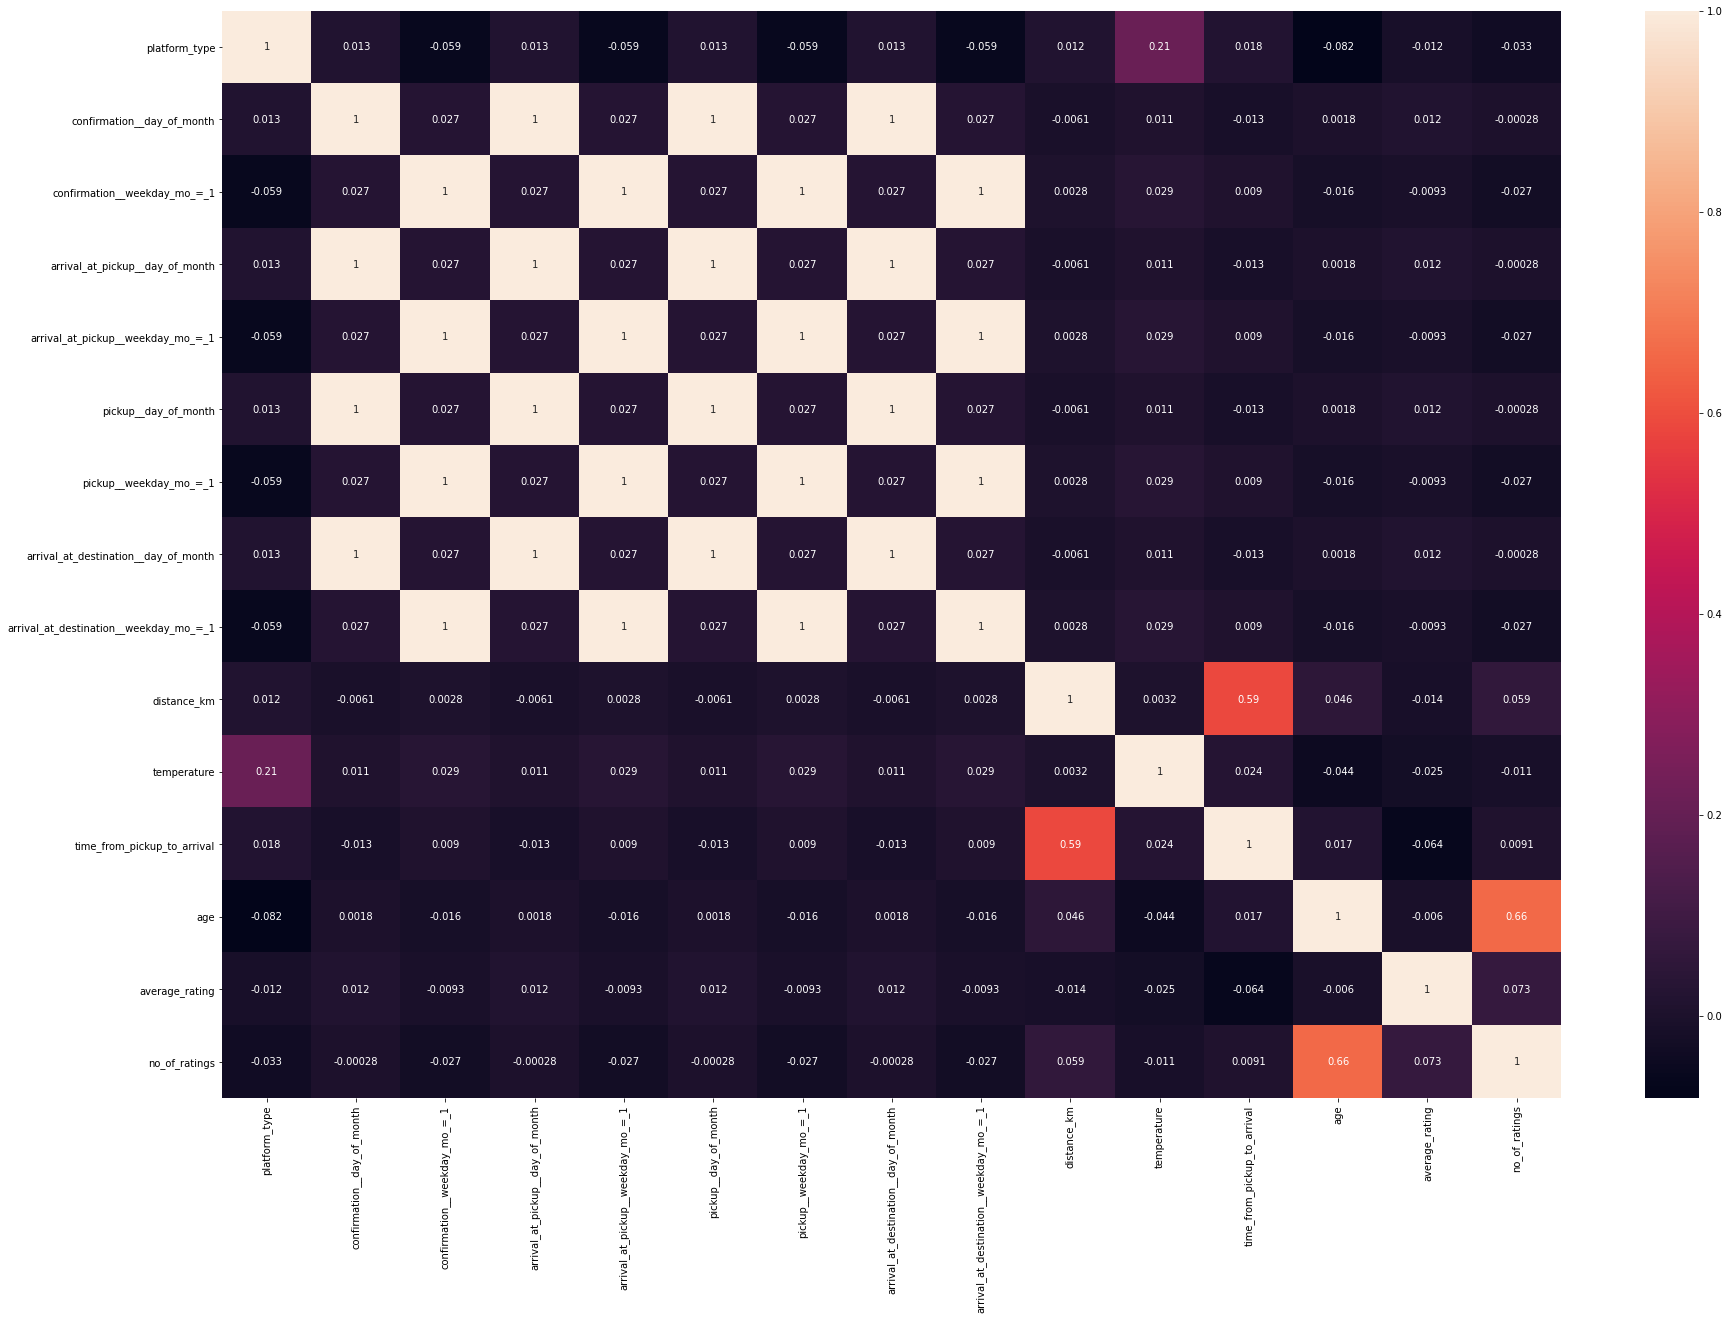

In [ ]:
# pearson correlation coefficient

new_train = train[['platform_type', 'personal_or_business', 'confirmation__day_of_month', 'confirmation__weekday_mo_=_1','arrival_at_pickup__day_of_month',
             'arrival_at_pickup__weekday_mo_=_1', 'pickup__day_of_month','pickup__weekday_mo_=_1', 'arrival_at_destination__day_of_month', 'arrival_at_destination__weekday_mo_=_1',
             'distance_km', 'temperature', 'time_from_pickup_to_arrival', 'age', 'average_rating', 'no_of_ratings']]
plt.figure(figsize = (30, 20))
sns.heatmap(new_train.corr(),annot=True)
plt.show()


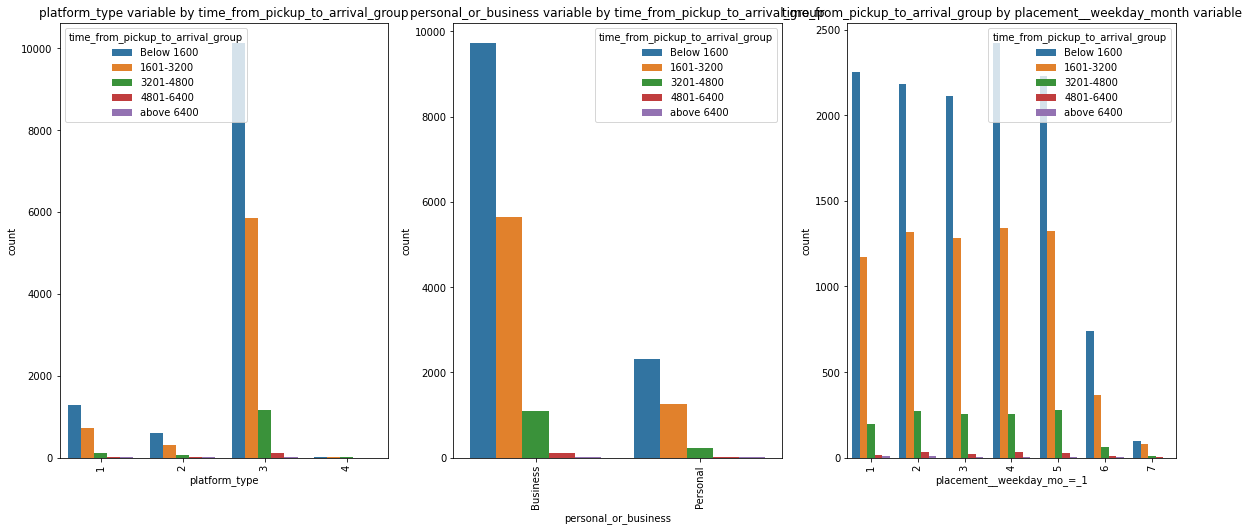

In [ ]:
# comparing time from pickup to arrival group with, platform_type, personal_or_business, placement__weekday_mo_=_1
fig,ax=plt.subplots(1,3,figsize=(20,8))

sns.countplot('platform_type',hue='time_from_pickup_to_arrival_group',data=train,ax=ax[0])
ax[0].set_title('platform_type variable by time_from_pickup_to_arrival_group')


sns.countplot('personal_or_business',hue='time_from_pickup_to_arrival_group',data=train,ax=ax[1])
ax[1].set_title('personal_or_business variable by time_from_pickup_to_arrival_group')


sns.countplot('placement__weekday_mo_=_1',hue='time_from_pickup_to_arrival_group',data=train,ax=ax[2])
ax[2].set_title(' time_from_pickup_to_arrival_group by placement__weekday_month variable ')



for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


plt.show()

from the graphs above,

1.   platform_type: On platform three, there was a higher frequency of pickup delivery time. Most deliveries were done below 1600 seconds

2.    personal_or _business: Short pickup delivery time for business as compared to personal

3.    placement_weekday_month: Short pickup delivery time on the 4th and first day and   

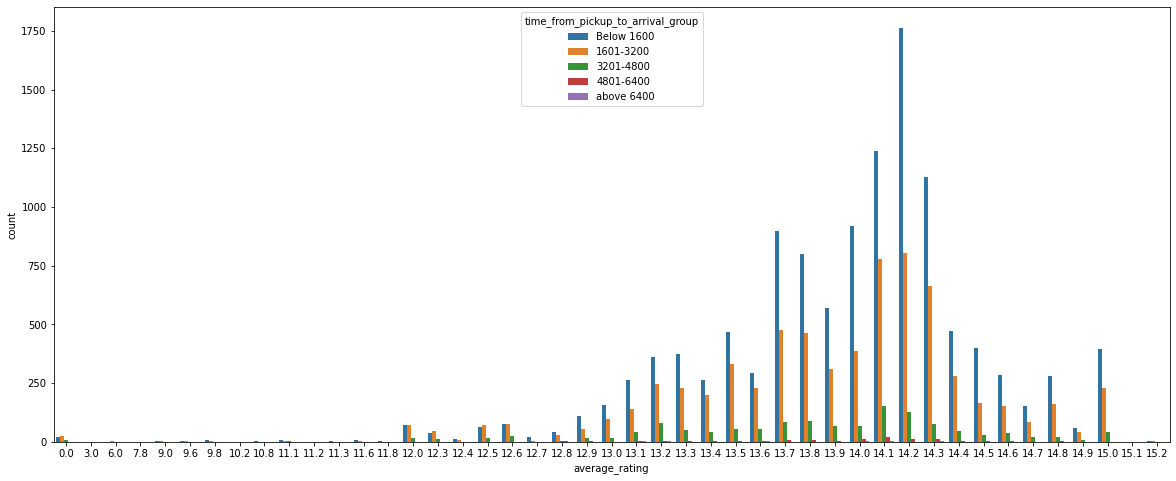

In [ ]:
# time from pickup to arrival by the average rating variable
plt.figure(figsize=(20,8))
sns.countplot('average_rating', hue='time_from_pickup_to_arrival_group', data=train)

average_rating 14.1-14.3 was a reflection of shorter pickup delivery time.

<Figure size 1440x1080 with 0 Axes>

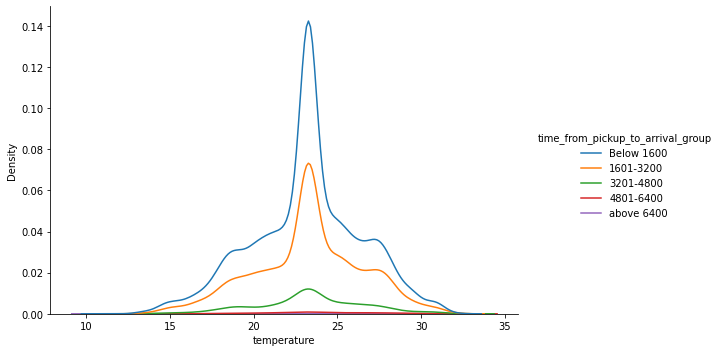

In [ ]:
# time of delivery by temperature
plt.figure(figsize = (20, 15))
sns.displot(x='temperature', hue='time_from_pickup_to_arrival_group', data=train, kind='kde', aspect=1.5)

<Figure size 1440x1080 with 0 Axes>

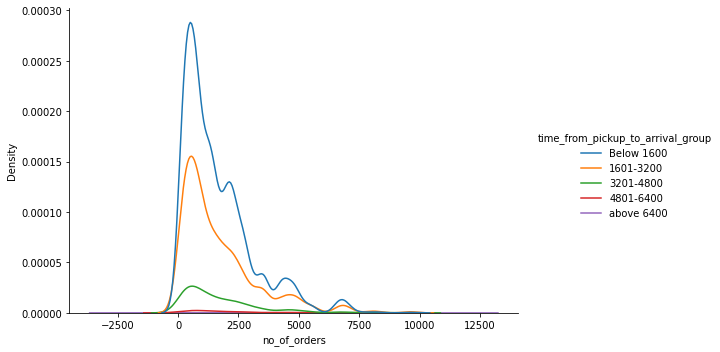

In [ ]:
# time from pick up to arrival by no of orders
plt.figure(figsize = (20, 15))
sns.displot(x='no_of_orders', hue='time_from_pickup_to_arrival_group', data=train, kind='kde', aspect=1.5)

For an number of orders that's within a range of 0-2500, pickup delivery time was shorter as compared to number of order that from 2500 and above

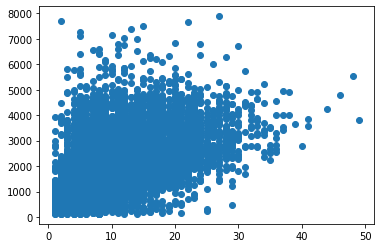

In [ ]:
# scatterplot showing the correlaton between distance in km and time from pickup to arrival

plt.scatter(train['distance_km'], train['time_from_pickup_to_arrival'])

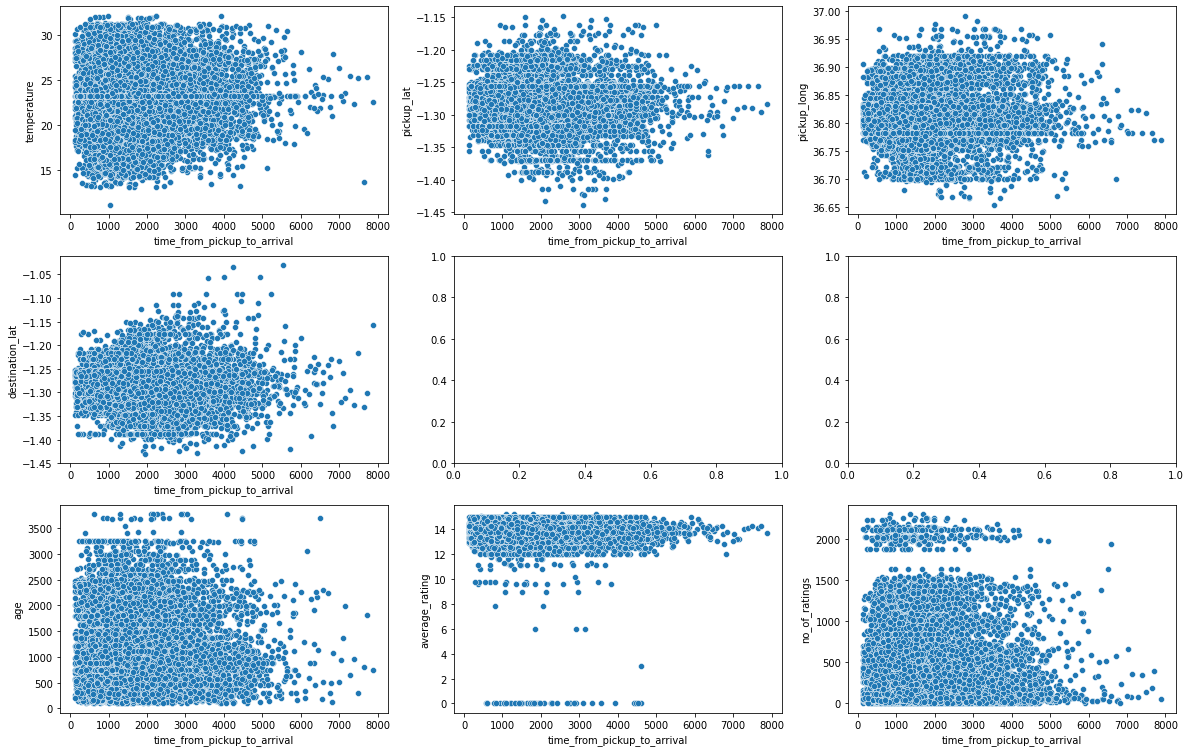

In [ ]:
###looking if its linear relation
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))=plt.subplots(3,3,figsize=(20,13))
sns.scatterplot(x='time_from_pickup_to_arrival',y='temperature',data=train,ax=ax1)
sns.scatterplot(x='time_from_pickup_to_arrival',y='pickup_lat',data=train,ax=ax2)
sns.scatterplot(x='time_from_pickup_to_arrival',y='pickup_long',data=train,ax=ax3)
sns.scatterplot(x='time_from_pickup_to_arrival',y='destination_lat',data=train,ax=ax4)
sns.scatterplot(x='time_from_pickup_to_arrival',y='age',data=train,ax=ax7)
sns.scatterplot(x='time_from_pickup_to_arrival',y='average_rating',data=train,ax=ax8)
sns.scatterplot(x='time_from_pickup_to_arrival',y='no_of_ratings',data=train,ax=ax9)

# Feature Engineering

In [ ]:
# excluding columns that will not serve a purpose since we have new varables to use 
del train['order_no']
del train['user_id']
del train['vehicle_type']
del train['placement__time']
del train['confirmation__time']
del train['arrival_at_pickup__time']
del train['arrival_at_destination__time']
del train['pickup__time']
del train['rider_id']
del train['pick_up_delivery_time_group']

del train['placement_hour']
del train['placement']
del train['confirmation']
del train['confirmation_hour']
del train['arrival_at_pickup']
del train['arrival_at_pickup_hour']
del train['placement__day_of_month']
del train['placement__weekday_mo_=_1']
del train['confirmation__weekday_mo_=_1']
del train['confirmation__day_of_month']
del train['arrival_at_pickup__day_of_month']
del train['arrival_at_pickup__weekday_mo_=_1']
del train['pickup__day_of_month']
del train['pickup__weekday_mo_=_1']
del train['arrival_at_destination__day_of_month']
del train['arrival_at_destination__weekday_mo_=_1']
del train['time_from_pickup_to_arrival_group']

In [ ]:
### our data to feature engineer
train.head()

,platform_type,personal_or_business,distance_km,temperature,pickup_lat,pickup_long,destination_lat,destination_long,time_from_pickup_to_arrival,no_of_orders,age,average_rating,no_of_ratings,placement_day_into_weeks,placement_time_of_day,arrival time of day,confirmation time of day,weekend/week day
0,3,Business,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549,2nd Week,Morning,Morning,Morning,Weekday
1,3,Personal,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,1993,396,339,13.6,69,2nd Week,Morning,Morning,Morning,Weekday
2,3,Business,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,455,1023,242,12.5,114,4th Week,Noon,Noon,Noon,Weekday
3,3,Business,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,1341,886,283,14.5,113,2nd Week,Morning,Morning,Morning,Weekday
4,1,Personal,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,1214,2311,872,14.1,533,2nd Week,Morning,Morning,Morning,Weekday


### 1. Label Encoding.

In [ ]:
 # performing label encoding to the columns:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
 # personal_or_business
train['personal_or_business']=le.fit_transform(train['personal_or_business'])
# placement_time_of_day
train['placement_time_of_day'] = le.fit_transform(train['placement_time_of_day'])

# weekend/week day
train['weekend/week day'] = le.fit_transform(train['weekend/week day'])

# placement_day_into_weeks
train['placement_day_into_weeks'] = le.fit_transform(train['placement_day_into_weeks'])
##arrival time of day
train['arrival time of day'] = le.fit_transform(train['arrival time of day'])
## confirmation
train['confirmation time of  day']=le.fit_transform(train['confirmation time of  day'])

### 2. Dividing Data into Labels and features

In [ ]:
#split the features to independent and target variable
y=train['time_from_pickup_to_arrival']
x=train.drop('time_from_pickup_to_arrival',axis=1)

### 3. Backward Elimination

In [ ]:
#feature selection using stepwise regression
# our alpha is 0.05, hence we drop features  that pvalue > alpha
import statsmodels.api as sm
x=sm.add_constant(x)
sm.OLS(y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     time_from_pickup_to_arrival   R-squared:                       0.352
Model:                                     OLS   Adj. R-squared:                  0.351
Method:                          Least Squares   F-statistic:                     650.3
Date:                         Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                                 10:59:22   Log-Likelihood:            -1.6436e+05
No. Observations:                        20379   AIC:                         3.288e+05
Df Residuals:                            20361   BIC:                         3.289e+05
Df Model:                                   17                                         
Covariance Type:                     nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      4.269e+04   6829.138      6.251      0.000    2.93e+04    5.61e+04
platform_type                15.4466     12.249      1.261      0.207      -8.562      39.456
personal_or_business         22.0717     19.917      1.108      0.268     -16.966      61.110
distance_km                 100.3084      0.987    101.617      0.000      98.374     102.243
temperature                   2.4639      1.872      1.316      0.188      -1.205       6.132
pickup_lat                  159.4746    180.985      0.881      0.378    -195.271     514.220
pickup_long                -946.7335    146.897     -6.445      0.000   -1234.663    -658.804
destination_lat            -405.3366    155.237     -2.611      0.009    -709.615    -101.059
destination_long           -187.3738    121.963     -1.536      0.124    -426.430      51.683
no_of_orders                 -0.0025      0.008     -0.295      0.768      -0.019       0.014
age                           0.0102      0.012      0.875      0.381      -0.013       0.033
average_rating              -55.3201      5.993     -9.231      0.000     -67.067     -43.574
no_of_ratings                -0.0565      0.031     -1.817      0.069      -0.117       0.004
placement_day_into_weeks     -9.0092      4.914     -1.833      0.067     -18.641       0.622
placement_time_of_day       -36.3398     15.066     -2.412      0.016     -65.871      -6.809
arrival time of day          17.6443      8.394      2.102      0.036       1.191      34.098
confirmation time of  day    44.2368     17.869      2.476      0.013       9.211      79.262
weekend/week day           -130.1707     21.830     -5.963      0.000    -172.960     -87.382
==============================================================================
Omnibus:                     8148.255   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42295.514
Skew:                           1.879   Prob(JB):                         0.00
Kurtosis:                       8.974   Cond. No.                     3.18e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

the most relevant features that sendy should focus in order to predict the delivery time are

distance_km	


pickup_long	
	
no_of_orders	

average_rating	
no_of_ratings	
placement_day_into_weeks	
placement_time_of_day	
arrival time of day	
confirmation time 
weekend/week day

In [ ]:
## removing  the the features that pvalue > alpha
x.drop(['age','no_of_orders','destination_long','pickup_lat','temperature','personal_or_business','platform_type'],axis=1,inplace=True)

### 4. Scaling the features

In [ ]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)

### 5. polynomial features

In [ ]:
### Our features are non-linear hence fit and transform them into polynomial features
from sklearn.preprocessing import PolynomialFeatures
x_poly=PolynomialFeatures(degree=2)
x=x_poly.fit_transform(x)

### 6. Spliting data into train and test(KFolds)

In [ ]:
### splitting data using 5folds
# With 5 folds, 80% of our data in the training set, and 20% in the test set
from sklearn.model_selection import train_test_split,KFold
folds = KFold(n_splits=5)
print('we are using ' +str(folds.get_n_splits(x)) + ' folds')
for train_index, test_index in folds.split(x):
 print('folds')
#setting up the train and test based on the split determined by KFold
 x_train, x_test = x[train_index], x[test_index]
 y_train, y_test = y[train_index], y[test_index]

we are using 5 folds
folds
folds
folds
folds
folds


#Modelling.

## 1. Base Models

Decision Trees

In [ ]:
# Create an updated decision tree classifier
# Let's try and balance things out by adding a maximum depth to the tree, and a minimum split size. Let's try training a new model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_split = 20, max_depth=5)
# Train it on our training set.
tree = tree.fit(x_train, y_train)
# Predict based on the model we've trained
y_pred = tree.predict(x_test)
### calculating performance metrics
#RMSE
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
##Adjusted R2
print('Adjusted R-squared:', r2_score(y_test,y_pred))

RMSE: 750.008430302835
Adjusted R-squared: 0.35486151672185806


Random Forest Regressor

In [ ]:
# Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(x_train, y_train)
# Predict based on the model we've trained
y_pred = forest.predict(x_test)
#RMSE
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
##Adjusted R2
print('Adjusted R-squared:', r2_score(y_test,y_pred))

RMSE: 736.9867344975189
Adjusted R-squared: 0.37706891906224316


XGBOOST

In [ ]:
### computing XGBOOST
import xgboost as xgb
xg_reg = xgb.XGBRegressor(colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
### fitting the model
model3=xg_reg.fit(x_train,y_train)
## prediction using xgboost
y_pred=model3.predict(x_test)
### calculating performance metrics
#RMSE
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
##Adjusted R2
print('Adjusted R-squared:', r2_score(y_test,y_pred))

[10:59:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 953.6968834845717
Adjusted R-squared: -0.043137085588708546


Support Vector Machine

In [ ]:
# Creating Support Vector Machine machine using poly as kernel
from sklearn.svm import SVR
svm=SVR(kernel='poly')
model2=svm.fit(x_train,y_train)
#predicting
y_pred=model2.predict(x_test)
### calculating performance metrics
#RMSE
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
##Adjusted R2
print('Adjusted R-squared:', r2_score(y_test,y_pred))

RMSE: 935.4404193124177
Adjusted R-squared: -0.0035821345134501303


Neural Network

In [ ]:
####using Neural network 
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor(random_state=123,max_iter=500)
## fitting the model
model4=mlp.fit(x_train,y_train)
#predict
y_pred=model4.predict(x_test)
### calculating performance metrics
#RMSE
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
##Adjusted R2
print('Adjusted R-squared:', r2_score(y_test,y_pred))

RMSE: 743.0730399556992
Adjusted R-squared: 0.3667376503132551


Linear Regression

In [ ]:
# USing multiple  Linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
##  fiting the regression
regressor.fit(x_train, y_train)
#Making predictions
y_pred = regressor.predict(x_test)
### calculating performance metrics
#RMSE
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
##Adjusted R2
print('Adjusted R-squared:', r2_score(y_test,y_pred))

RMSE: 739.0409656660453
Adjusted R-squared: 0.3735914403420785


Ridge Regression

In [ ]:
# Using Ridge Regression
from sklearn.linear_model import Ridge
#fitting the model
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(x_train,y_train)
#Making predictions
y_pred=ridge.predict(x_test)
### calculating performance metrics
#RMSE
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
##Adjusted R2
print('Adjusted R-squared:', r2_score(y_test,y_pred))

RMSE: 738.9131095076061
Adjusted R-squared: 0.373808162466718


Lasso Regression

In [ ]:
# Creating lasso object 
from sklearn import linear_model
lasso = linear_model.Lasso() 
# Fitting the models
lasso.fit(x_train, y_train) 
y_pred=lasso.predict(x_test)
### calculating performance metrics
#RMSE
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
##Adjusted R2
print('Adjusted R-squared:', r2_score(y_test,y_pred))

RMSE: 738.332344109558
Adjusted R-squared: 0.3747921147868817


## 2. Hyper-parameter tunning

Random Forest Regressor hyperparameter Tuning

In [ ]:
from pprint import pprint
# checking the parameters currently in use
print('parameters currently in use:\n')
pprint(forest.get_params)

parameters currently in use:

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)>


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100,200]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
#grid_search.fit(x_train, y_train)
#grid_search.best_params_

In [ ]:
# Fitting the best parameters from Gridsearch
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split=12, max_features=8, min_samples_leaf=9)
forest = forest.fit(x_train, y_train)
# Predict based on the model we've trained
y_pred = forest.predict(x_test)
### calculating performance metrics
#RMSE
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
##Adjusted R2
print('Adjusted R-squared:', r2_score(y_test,y_pred))

RMSE: 731.2230956814159
Adjusted R-squared: 0.38677414262284293


Recomendations


1.   We recommend that we use Random, Lasso and Ridge for regression model
2.   Further optimization of the above models can lead to the improvements of the metric score
3.  Sendy should also focus on the personal side in order as evident by the bivariate analysis 

